In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv(r'datasets/iris.csv')

In [24]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df = df.drop('Id', axis = 1)

In [26]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [27]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [28]:
df.shape

(150, 5)

In [29]:
# bivariate --
# cont - cont --> scatter - corr
# cont - categorical --> barplot 
# categorical - categorical --> stacked, grouped bar plot

In [45]:
cont_cols= df.dtypes[df.dtypes == 'float64'].index.tolist()
cont_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [ ]:
## cont - cont

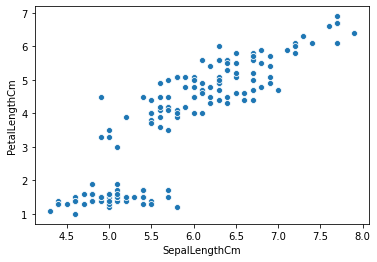

In [31]:
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = df)

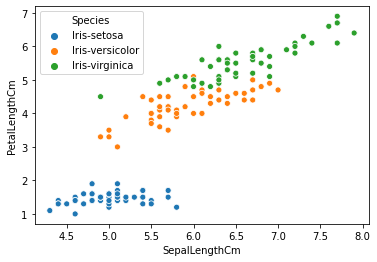

In [32]:
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm', data = df, hue = 'Species')

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)>

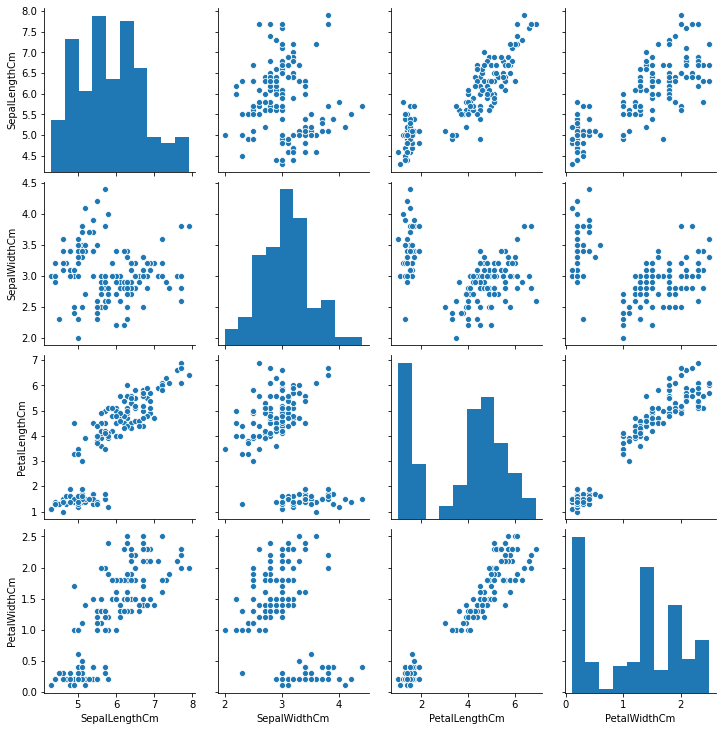

In [39]:
sns.pairplot(data = df)

In [41]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


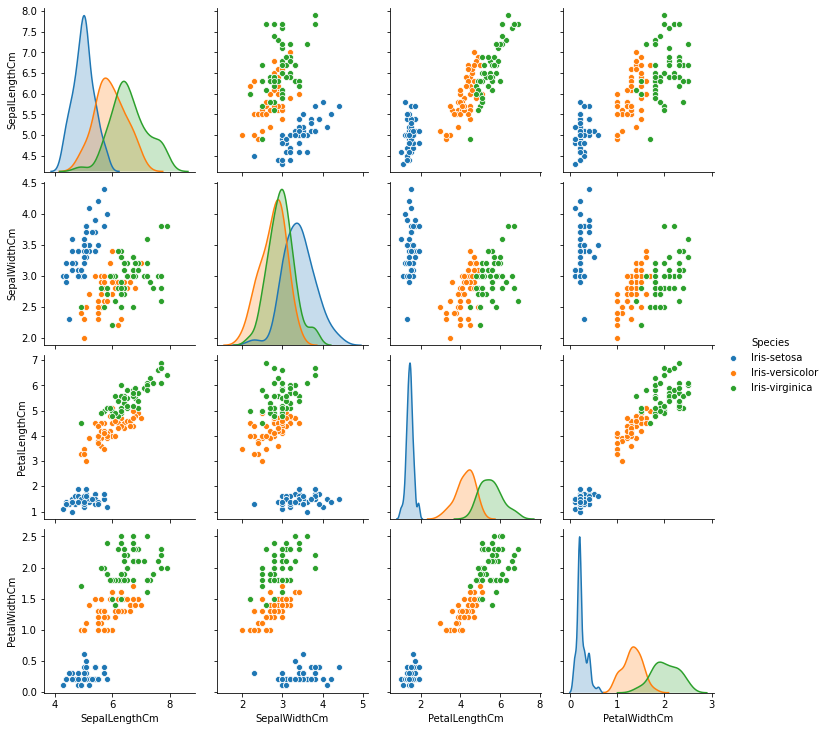

In [34]:
sns.pairplot(data = df, hue = 'Species')

In [42]:
# cont - categorical

In [43]:
## barplot, boxplot

In [46]:
cont_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

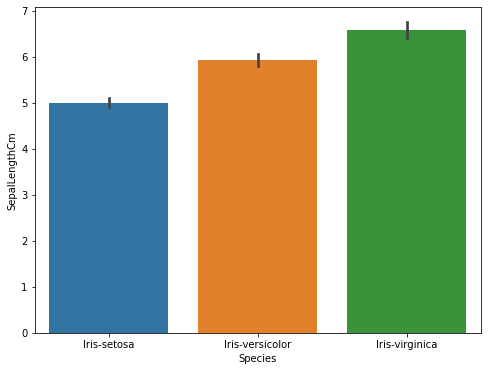

In [57]:
plt.figure(figsize = (8,6))
sns.barplot(x = 'Species', y = 'SepalLengthCm', data = df)

In [54]:
df.groupby('Species')['SepalLengthCm'].mean()

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

In [79]:
df.groupby('Species')['SepalLengthCm'].median()

Species
Iris-setosa        5.0
Iris-versicolor    5.9
Iris-virginica     6.5
Name: SepalLengthCm, dtype: float64

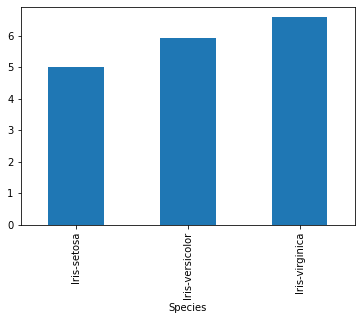

In [55]:
df.groupby('Species')['SepalLengthCm'].mean().plot(kind = 'bar')

In [51]:
df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].mean()

5.005999999999999

In [52]:
df[df['Species'] == 'Iris-setosa']['SepalLengthCm'].std()

0.3524896872134512

In [58]:
cont_cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [66]:
obj_col = 'Species'

In [76]:
def plot_barplots(cont_cols, ob_col, df, est = 'default'):
    
    c = 3
    t= len(cont_cols)

    r = t/c
    if int(r) != r:
        r = int(r) + 1
    else:
        r = int(r)

    plt.rcParams["figure.figsize"] = [20, 5*r]

    count = 1

    for i in cont_cols:

        plt.subplot(r,c, count)
        if est == 'median':
            sns.barplot(x = ob_col, y = i, data = df, estimator = np.median)
        else:
            sns.barplot(x = ob_col, y = i, data = df)

        count += 1

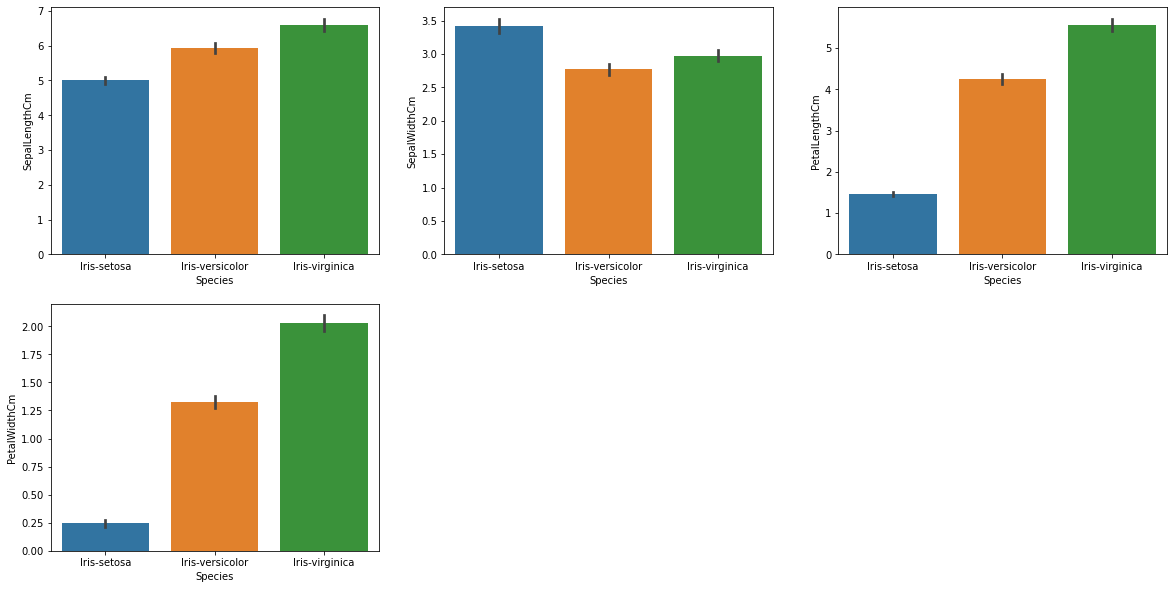

In [77]:
plot_barplots(cont_cols, obj_col, df)

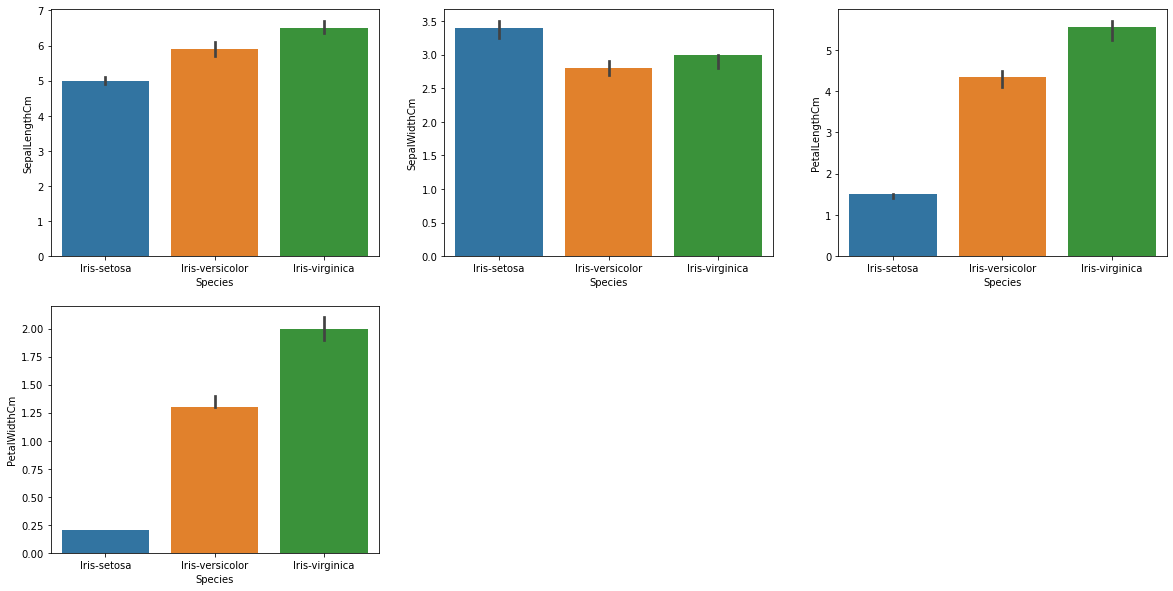

In [78]:
plot_barplots(cont_cols, obj_col, df, 'median')

In [ ]:
# cat - cat